In [59]:
import sklearn.datasets

from utils.data.helpers import rotate
from utils.data.datasets import ModelParamsDataset
from utils.model.models import MLP
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import torch

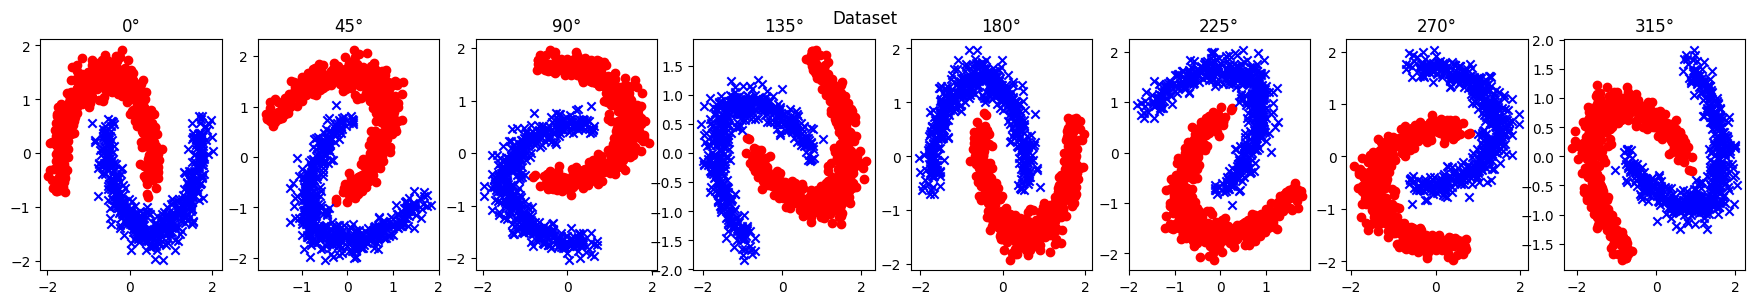

In [15]:
# Dataset
X,y = sklearn.datasets.make_moons(n_samples=1000, noise=0.1, random_state=42)
# Normalization
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Vizualization of different rotations
angles = [0, 45, 90, 135, 180, 225, 270, 315]

fig, ax = plt.subplots(1, 8, figsize=(22, 3))
fig.suptitle("Dataset")
for i, angle in enumerate(angles):
    X_rotated = rotate(X, angle)
    ax[i].scatter(X_rotated[y==0,0], X_rotated[y==0,1], color='red', marker='o')
    ax[i].scatter(X_rotated[y==1,0], X_rotated[y==1,1], color='blue', marker='x')
    ax[i].set_title(f"{angle}°")

plt.show()

In [68]:
dataset_path = "../data/eight_angles_extended.csv"

# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45)

torch.manual_seed(42)

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, [0.7, 0.2, 0.1])
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=32, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

print("Train sample:", len(dataset_train))
print("Validation sample:", len(dataset_valid))
print("Test sample:", len(dataset_test))

Train sample: 56000
Validation sample: 16000
Test sample: 8000


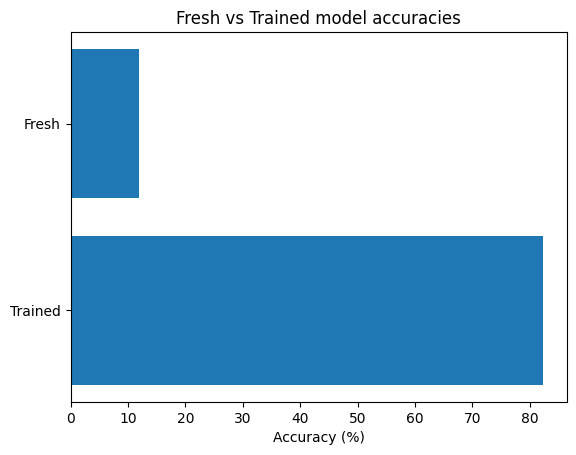

In [79]:
# Check improvement compared to a fresh model
model_fresh = MLP(151, [200, 200], 8, 0.4)
model_fresh.eval()

total_correct = 0
for X, y in dataloader_test:
    y_pred = model_fresh(X.float())
    # Accuracy
    y_pred = torch.argmax(y_pred, dim=1)
    correct = (y_pred == y).sum()
    total_correct += correct

accuracy_fresh = total_correct / len(dataloader_test.dataset) * 100

model = MLP(151, [200, 200], 8, 0.4)
model.load_state_dict(torch.load("../models/classifier.pth"))
model.eval()
total_correct = 0
for X, y in dataloader_test:
    y_pred = model(X.float())
    # Accuracy
    y_pred = torch.argmax(y_pred, dim=1)
    correct = (y_pred == y).sum()
    total_correct += correct

accuracy_trained = total_correct / len(dataloader_test.dataset) * 100

plt.title("Fresh vs Trained model accuracies")
plt.barh(["Trained", "Fresh"], [accuracy_trained.cpu().detach().numpy(), accuracy_fresh.cpu().detach().numpy()])
plt.xlabel("Accuracy (%)")
plt.show()